In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
df=pd.read_csv('fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

## Data visualization and preprocessing

In [4]:
df.shape

(6362620, 11)

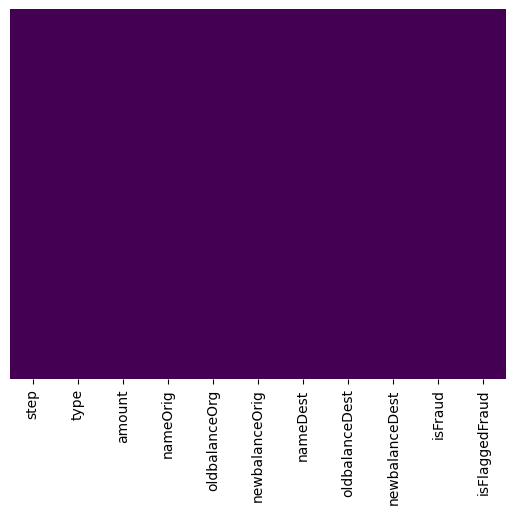

In [35]:
# Check null values
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

In [5]:
#Check duplicates
df.duplicated().sum()

0

Its clean dataset no duplicates or null values

## Check outliers

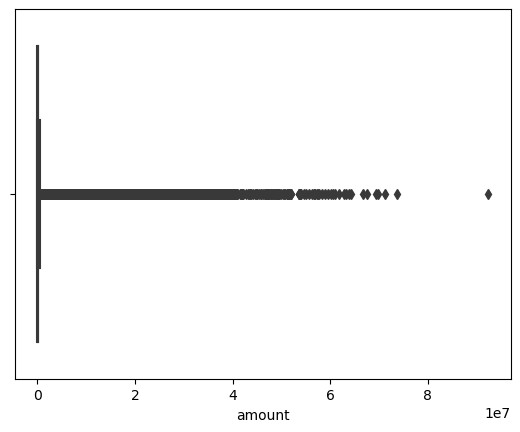

In [37]:
plt.figure
sns.boxplot(x= "amount",data = df, palette='winter')
plt.show()

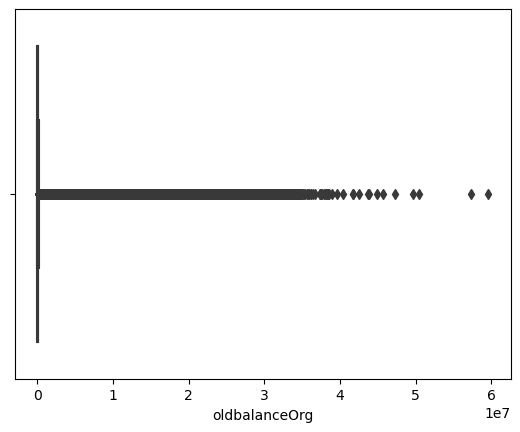

In [38]:
plt.figure
sns.boxplot(x= "oldbalanceOrg",data = df, palette='winter')
plt.show()

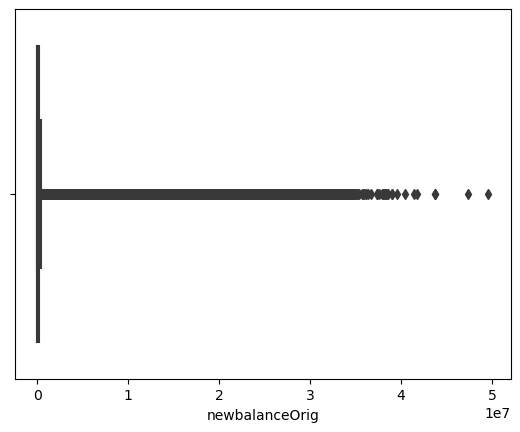

In [39]:
plt.figure
sns.boxplot(x= "newbalanceOrig",data = df, palette='winter')
plt.show()

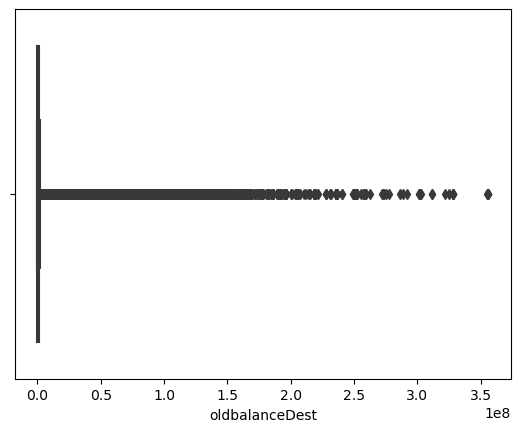

In [40]:
plt.figure
sns.boxplot(x= "oldbalanceDest",data = df, palette='winter')
plt.show()

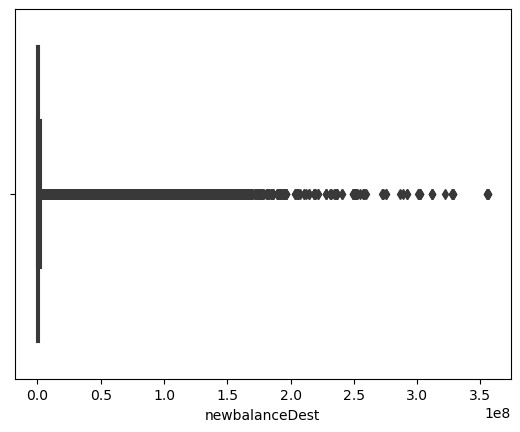

In [41]:
plt.figure
sns.boxplot(x= "newbalanceDest",data = df, palette='winter')
plt.show()

I can not drop the outliers because the dataset is imbalance as the number of class  1 in isFraud column is too little

In [6]:
# Get the number of fraud transaction and legal transaction
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

The dataset is imbalance

In [7]:
# Get the number of transaction types
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [8]:
# In wchich type of transaction the Fraud happend
fraud_transactions = df[df["isFraud"] == 1]
fraud_counts_by_type = fraud_transactions.groupby("type").size()
print(fraud_counts_by_type)

type
CASH_OUT    4116
TRANSFER    4097
dtype: int64


 Only in cash_out and transfer we found a fraud 

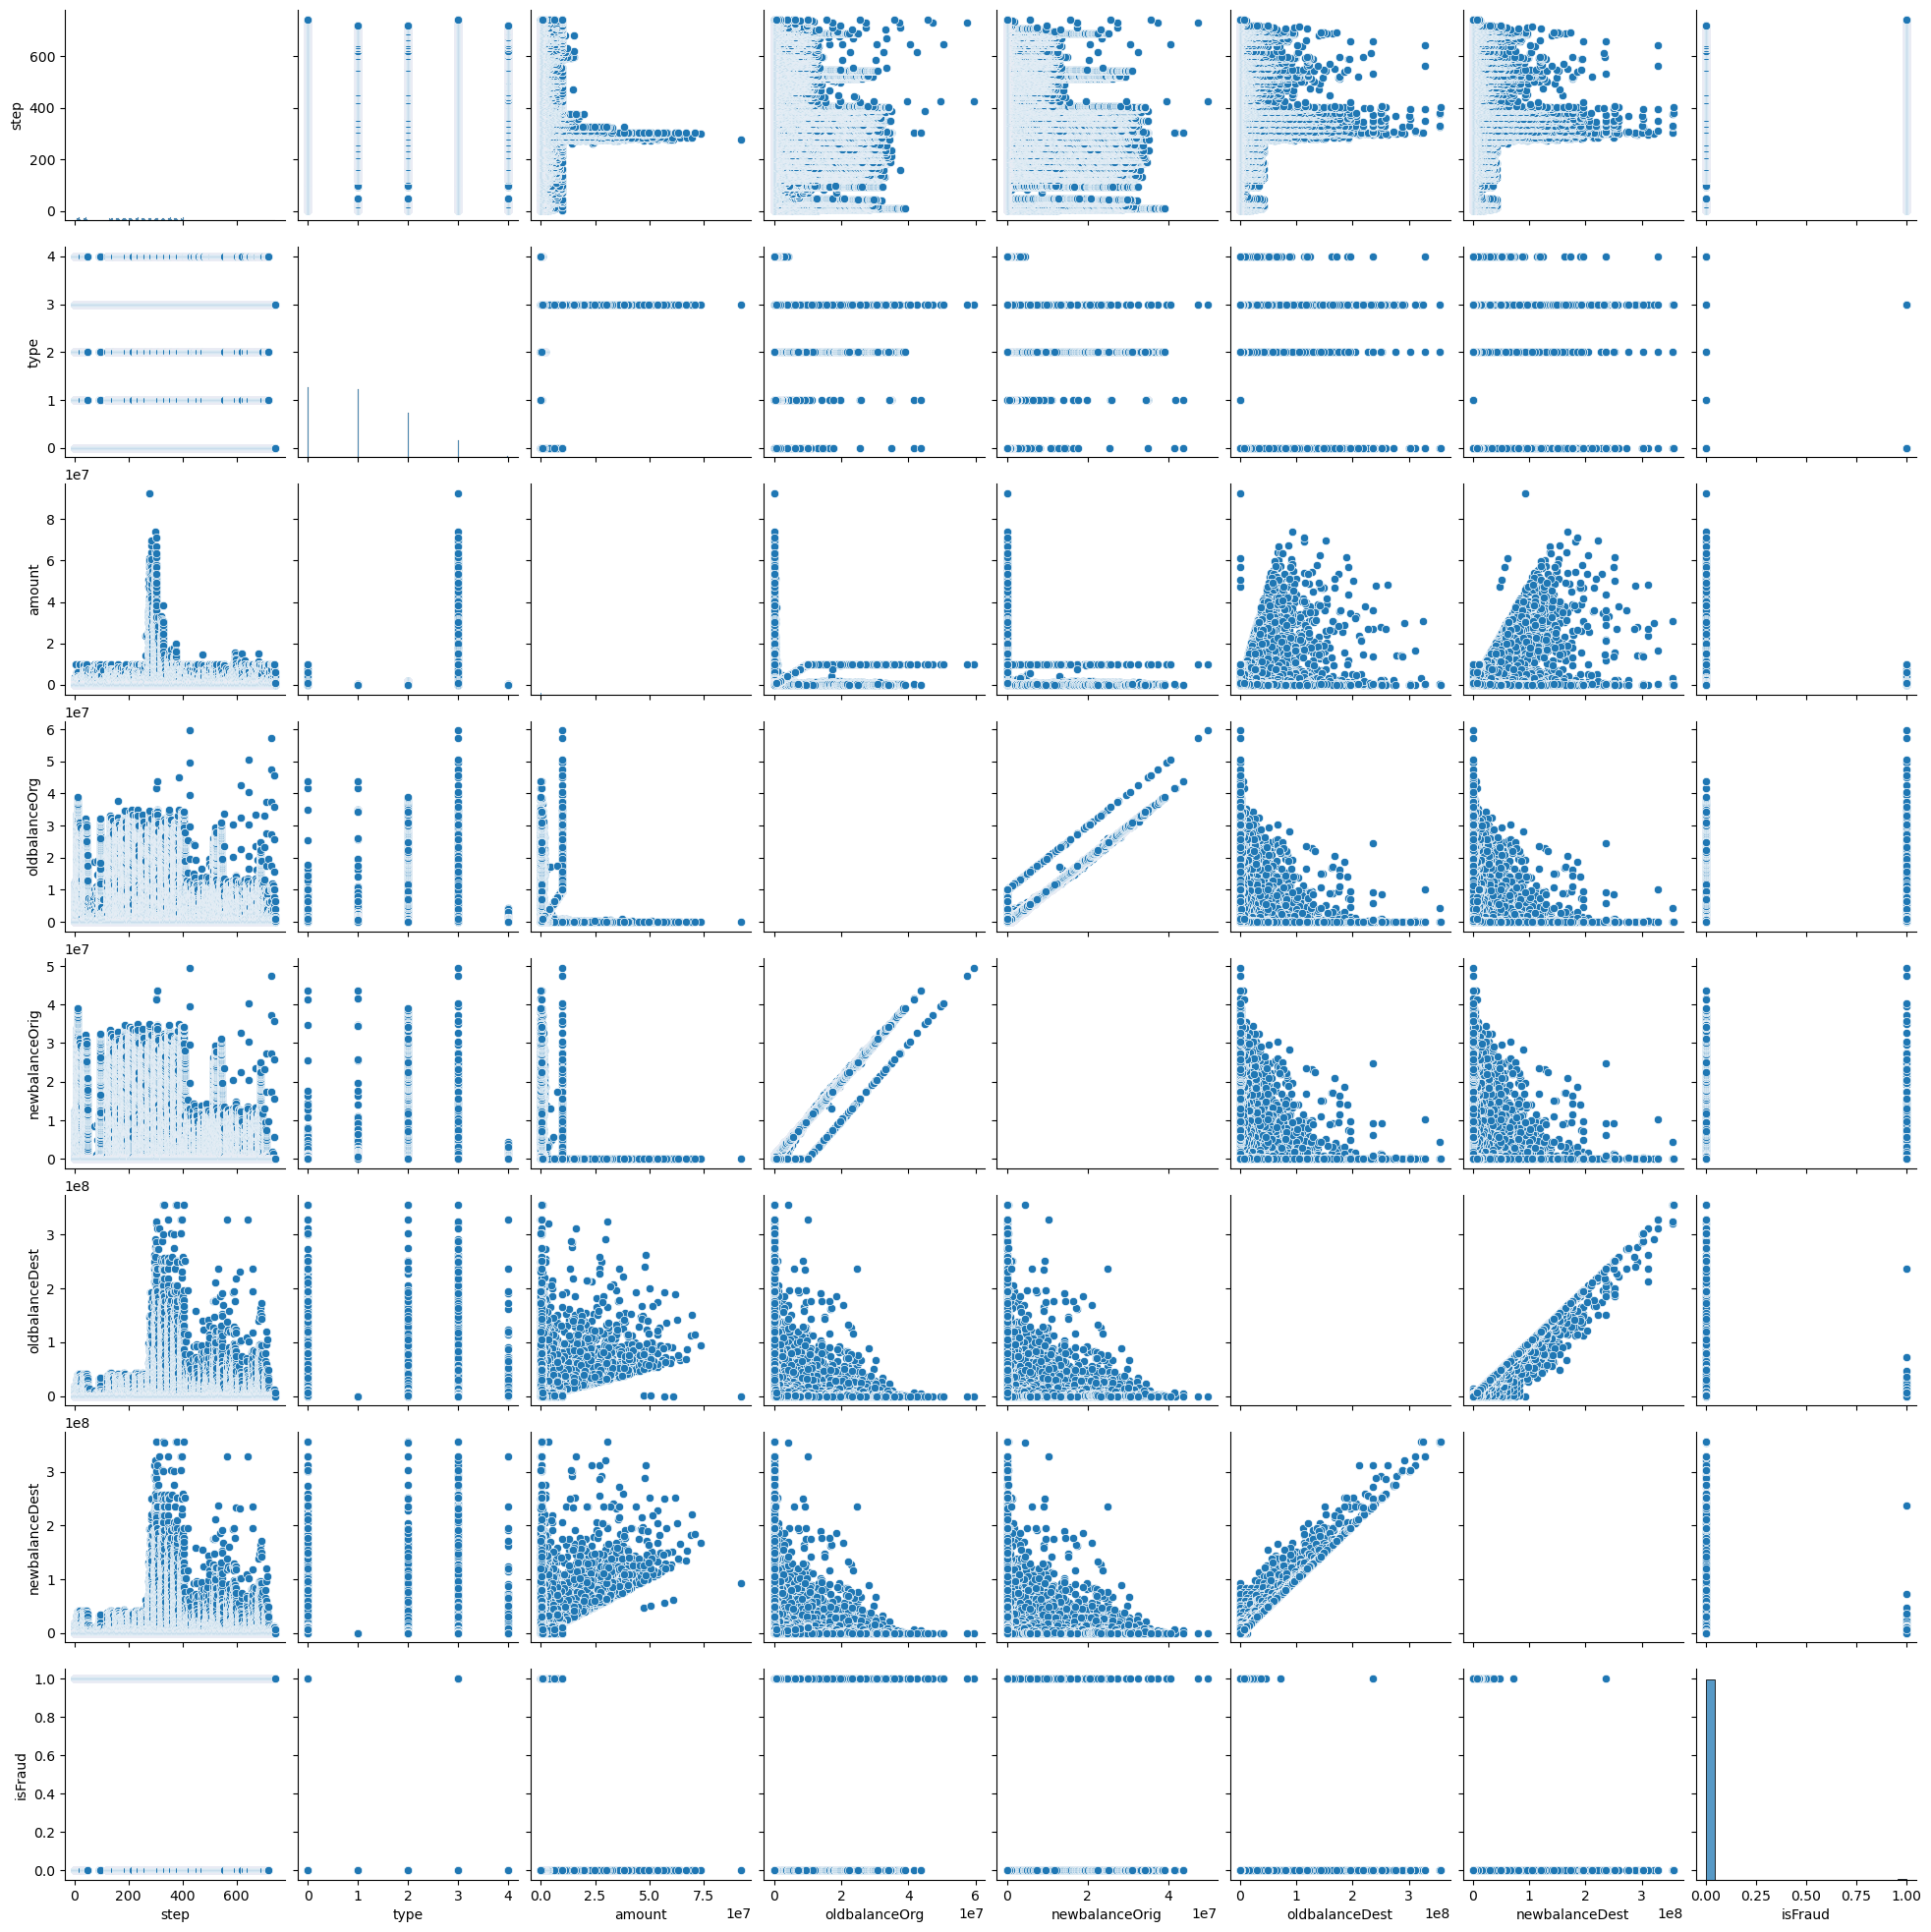

In [25]:
# Identify relationships between variables.
sns.pairplot(df)

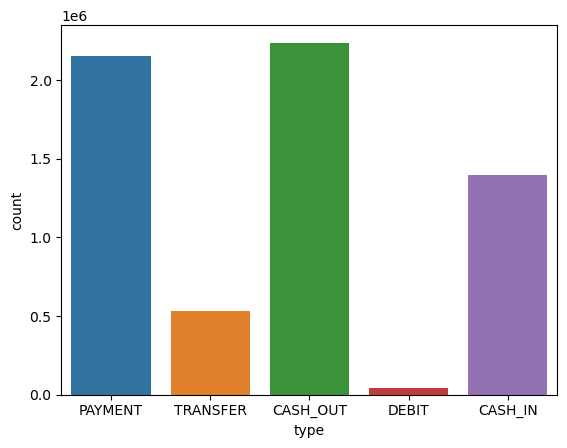

In [45]:
# visualize number of type 
sns.countplot(data = df , x= 'type');

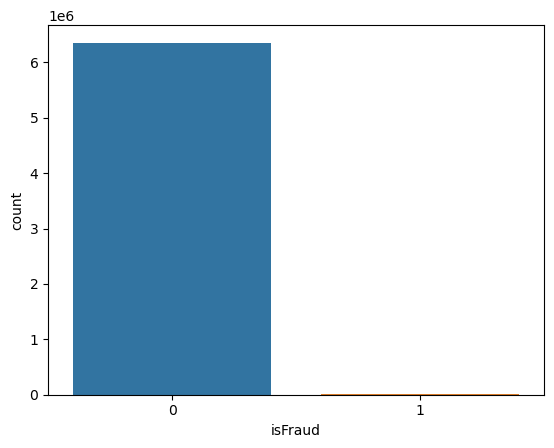

In [46]:
# Visualize number of isFraud (zero and one)
sns.countplot(data = df , x= 'isFraud');

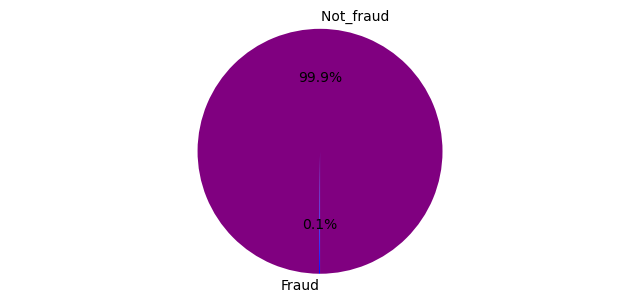

In [31]:
data = np.array([6354407,8213]) 
labels = ['Not_fraud ', 'Fraud']
colrs=['purple', 'blue']
fig, ax = plt.subplots(figsize=(8, 3.5)) 
ax.pie(data,
       labels=labels, autopct='%1.1f%%',
       startangle=270, colors=colrs) 
ax.axis('equal')
plt.show()

type
CASH_OUT    4116
TRANSFER    4097
dtype: int64


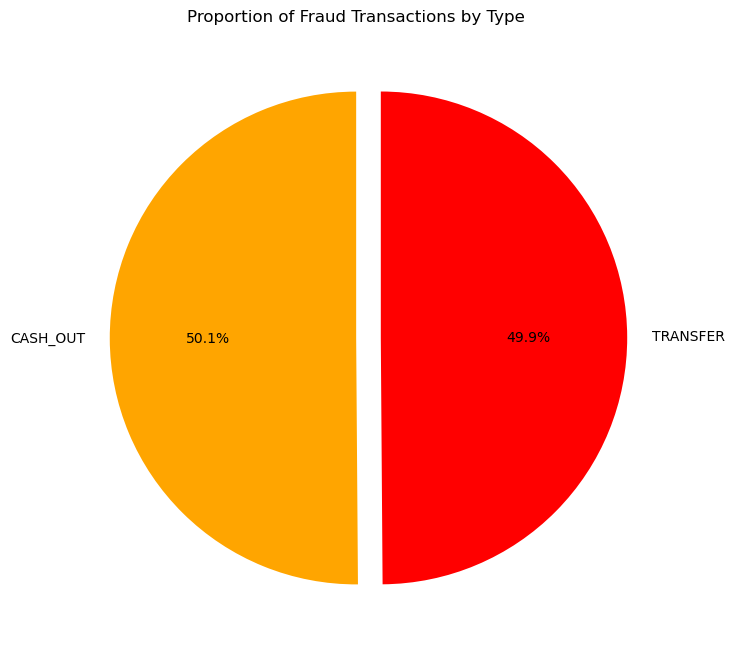

In [7]:
fraud_transactions = df[df["isFraud"] == 1]
fraud_counts_by_type = fraud_transactions.groupby("type").size()
print(fraud_counts_by_type)

plt.figure(figsize=(8, 8))
plt.pie(fraud_counts_by_type, labels=fraud_counts_by_type.index, autopct='%1.1f%%', startangle=90, colors=['orange', 'red'], explode=(0, 0.1))
plt.title('Proportion of Fraud Transactions by Type')
plt.show()

50.1% of fraud transection happen in CASH_OUT and 49.9 % in TRANSFER

In [4]:
# Covert varibales of coulmn type to numbers to apply the models
df['type']=df['type'].replace('CASH_OUT',0)
df['type']=df['type'].replace('PAYMENT',1)
df['type']=df['type'].replace('CASH_IN',2)
df['type']=df['type'].replace('TRANSFER',3)
df['type']=df['type'].replace('DEBIT',4)

In [5]:
# Function name convert varibales of nameOrig and nameDest to 0 or 1 depended on the first character of the records
# Starts with C means its a Customer so convert to 0
# Starts with M means its a merchant so convert to 1
def name(x):
    if x.startswith('C'):
        return '0'
    elif x.startswith('M'):
        return '1'

df['nameDest'] = df['nameDest'].apply(name)

In [6]:
df['nameOrig'] = df['nameOrig'].apply(name)

In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,0,170136.0,160296.36,1,0.0,0.0,0,0
1,1,1,1864.28,0,21249.0,19384.72,1,0.0,0.0,0,0
2,1,3,181.00,0,181.0,0.00,0,0.0,0.0,1,0
3,1,0,181.00,0,181.0,0.00,0,21182.0,0.0,1,0
4,1,1,11668.14,0,41554.0,29885.86,1,0.0,0.0,0,0


In [14]:
df['nameOrig'].value_counts()
# Only customers do transections 

0    6362620
Name: nameOrig, dtype: int64

In [15]:
df['nameDest'].value_counts()

0    4211125
1    2151495
Name: nameDest, dtype: int64

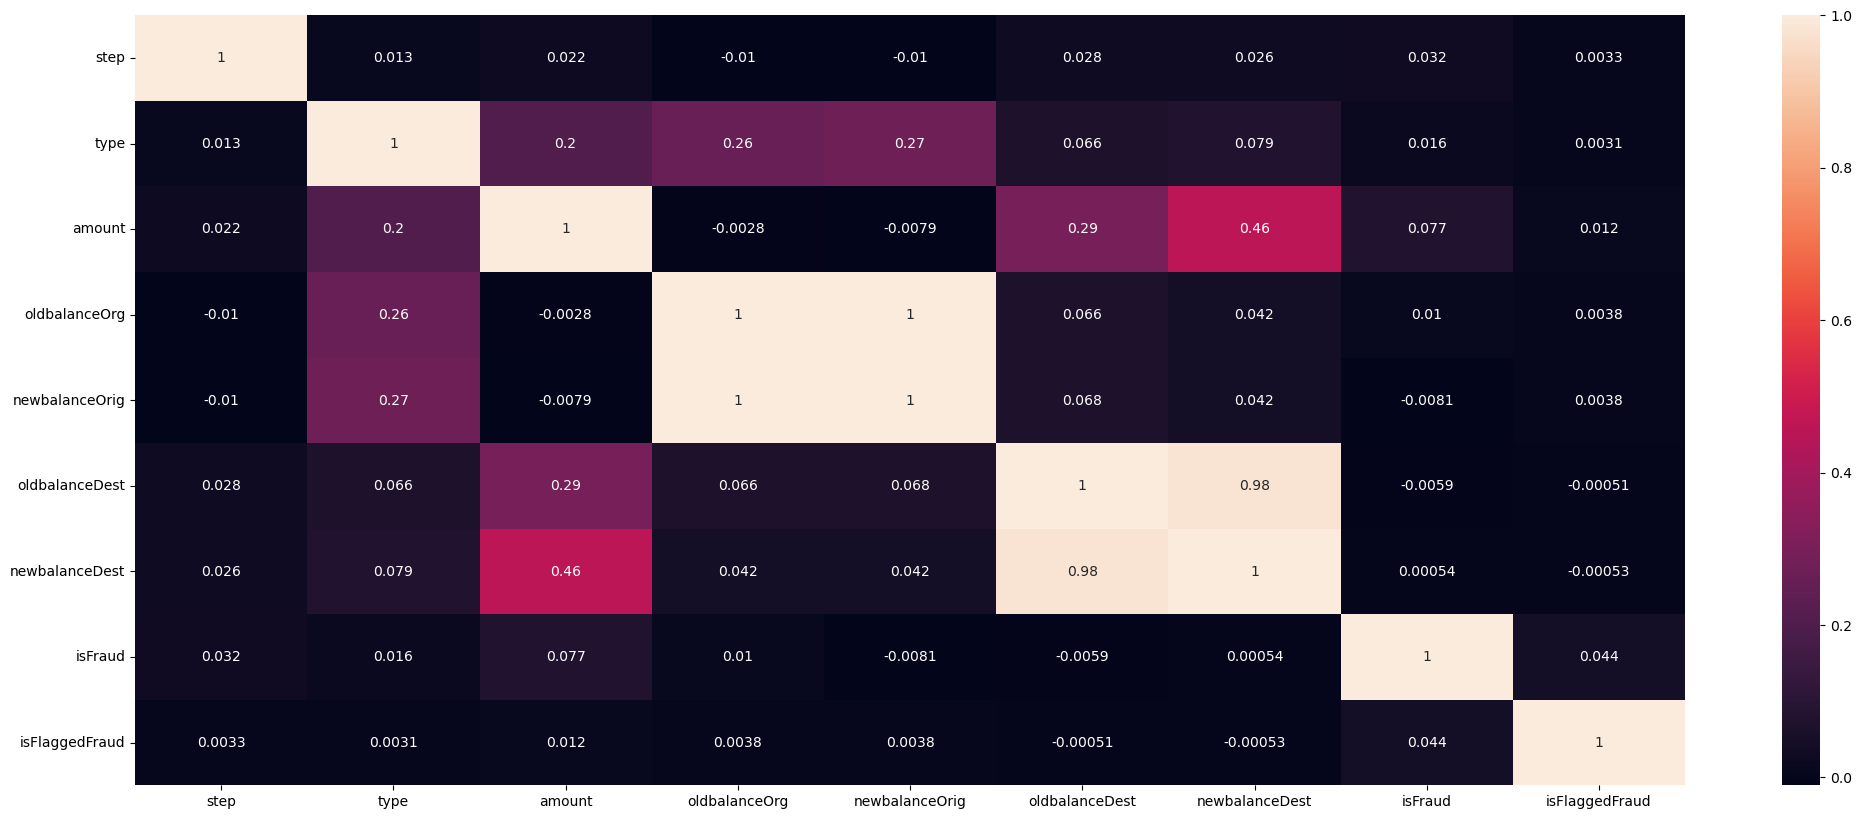

In [22]:
# Identify relationships between variables.
plt.figure(figsize = (25,10))
sns.heatmap(df.corr(),annot=True);

In [8]:
# Drop isFlaggedFraud column because the column does not serve a meaningful purpose in the context of the current analysis and is not relevant to our specific use case. By removing it, we streamline the dataset to focus on features that are more pertinent to the objectives of our analysis
df=df.drop(['isFlaggedFraud'], axis=1)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.64,0,170136.0,160296.36,1,0.0,0.0,0
1,1,1,1864.28,0,21249.0,19384.72,1,0.0,0.0,0
2,1,3,181.00,0,181.0,0.00,0,0.0,0.0,1
3,1,0,181.00,0,181.0,0.00,0,21182.0,0.0,1
4,1,1,11668.14,0,41554.0,29885.86,1,0.0,0.0,0


In [26]:
!pip install torch

     ------------------------------------ 192.2/192.2 MB 332.5 kB/s eta 0:00:00


In [28]:
!pip install torch-geometric

  Using cached torch_geometric-2.4.0-py3-none-any.whl (1.0 MB)


# Build Graph Neural Network 
I used two types of GNNs, first GCN before and after OverSamplimg and second GRAPHsage before and after OverSampling

In [9]:
import torch
from torch_geometric.data import Data


# Create nodes and edges
nodes = pd.concat([df['nameOrig'], df['nameDest']]).unique()
node_to_index = {node: index for index, node in enumerate(nodes)}
edges = torch.tensor(
    [[node_to_index[source], node_to_index[dest]] for source, dest in zip(df['nameOrig'], df['nameDest'])],
    dtype=torch.long
).t().contiguous()

# Create features 
features = torch.tensor(df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].values, dtype=torch.float)

# Create target labels
target = torch.tensor(df['isFraud'].values, dtype=torch.long)

# Create a PyTorch Geometric Data object
data = Data(x=features, edge_index=edges, y=target)


print(data)


Data(x=[6362620, 5], edge_index=[2, 6362620], y=[6362620])


In [10]:
# Convert target labels to binary beacuse the model didnot read it as 0 and 1 
target = torch.where(target != 0, 1, target)


In [11]:
# Check values in target labels
unique_labels = torch.unique(target)
print("Unique values in target labels:", unique_labels)

# Ensure the target labels are of type int
if target.dtype != torch.long:
    target = target.long()

unique_labels_after_conversion = torch.unique(target)
print("Unique values in target labels after conversion:", unique_labels_after_conversion)

# Check the shape of the target labels
if target.dim() > 1:
    target = target.squeeze()

# Ensure the target labels are 1-dimensional
if target.dim() > 1:
    raise ValueError("Target labels must be 1-dimensional.")

# Create a PyTorch Geometric Data object
data = Data(x=features, edge_index=edges, y=target)

Unique values in target labels: tensor([0, 1])
Unique values in target labels after conversion: tensor([0, 1])


## Apply GCN

Before OverSampling

Epoch 1/10, Loss: 147796.2500, Training Accuracy: 0.5647
Test Accuracy: 0.5829
Epoch 2/10, Loss: 93180.8828, Training Accuracy: 0.5833
Test Accuracy: 0.6029
Epoch 3/10, Loss: 46804.5664, Training Accuracy: 0.6032
Test Accuracy: 0.7718
Epoch 4/10, Loss: 11183.2617, Training Accuracy: 0.7716
Test Accuracy: 0.9984
Epoch 5/10, Loss: 719.1332, Training Accuracy: 0.9985
Test Accuracy: 0.9985
Epoch 6/10, Loss: 834.7441, Training Accuracy: 0.9985
Test Accuracy: 0.9985
Epoch 7/10, Loss: 920.9070, Training Accuracy: 0.9986
Test Accuracy: 0.9985
Epoch 8/10, Loss: 984.0742, Training Accuracy: 0.9986
Test Accuracy: 0.9985
Epoch 9/10, Loss: 1028.2819, Training Accuracy: 0.9986
Test Accuracy: 0.9985
Epoch 10/10, Loss: 1056.5383, Training Accuracy: 0.9986
Test Accuracy: 0.9985


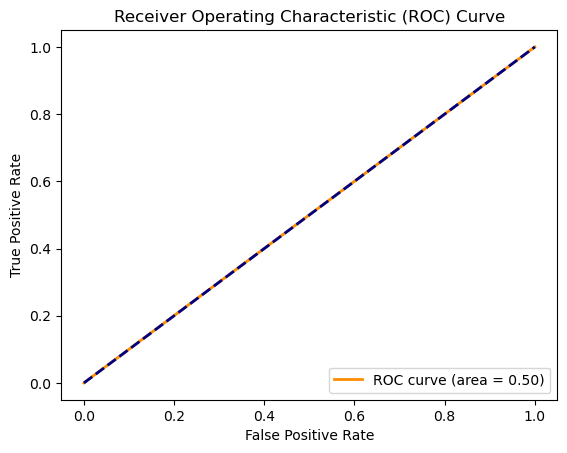

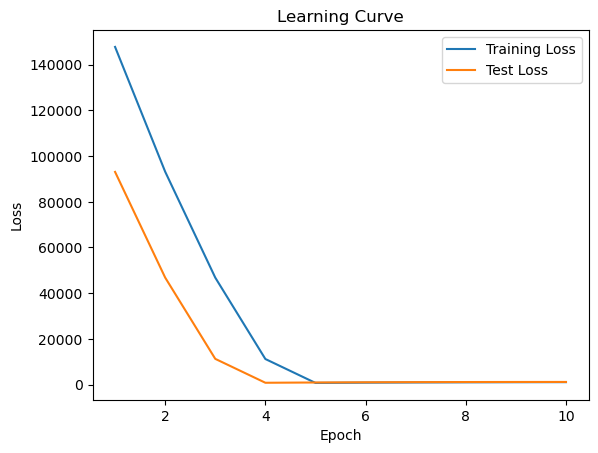

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270810
           1       0.00      0.00      0.00      1714

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
from torch_geometric.nn import GCNConv



num_samples = len(data.y)
num_train = int(0.8 * num_samples)  # Adjust the percentage of training set

train_indices, test_indices = torch.utils.data.random_split(range(num_samples), [num_train, num_samples - num_train])

# Create training and testing sets
train_data = Data(x=data.x[train_indices], edge_index=data.edge_index[:, train_indices], y=data.y[train_indices])
test_data = Data(x=data.x[test_indices], edge_index=data.edge_index[:, test_indices], y=data.y[test_indices])

# Define a GNN model
class GNN(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(in_channels, 16)
        self.conv2 = GCNConv(16, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Instantiate the model
model = GNN(in_channels=5, out_channels=1)
#Features in target out

# Define the number of epochs
num_epochs = 10

# Loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Lists to store learning curve data
train_losses = []
test_losses = []

# Train the model
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(train_data)
    loss = criterion(output, train_data.y.view(-1, 1).float())  
    loss.backward()
    optimizer.step()

    # Calculate accuracy on the training set
    predictions = (torch.sigmoid(output) > 0.5).float()
    accuracy = accuracy_score(train_data.y.cpu().numpy(), predictions.cpu().numpy())
    
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}, Training Accuracy: {accuracy:.4f}')
    
    # Append training loss to the list
    train_losses.append(loss.item())

    # Evaluate on the test set
    model.eval()
    with torch.no_grad():
        test_output = model(test_data)
        test_loss = criterion(test_output, test_data.y.view(-1, 1).float())
        test_predictions = (torch.sigmoid(test_output) > 0.5).float()

    # Calculate accuracy on the test set
    test_accuracy = accuracy_score(test_data.y.cpu().numpy(), test_predictions.cpu().numpy())
    print(f'Test Accuracy: {test_accuracy:.4f}')
    
    # Append test loss to the list
    test_losses.append(test_loss.item())
# Calculate ROC curve
fpr, tpr, _ = roc_curve(test_data.y.cpu().numpy(), test_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot learning curve
plt.figure()
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()
###################################### Print classification report
classification_rep = classification_report(test_data.y.cpu().numpy(), test_predictions.cpu().numpy())
print("Classification Report:\n", classification_rep)

1- Training process is performing well, with both training and test accuracies reaching high values. The decreasing loss over epochs indicates that the model is learning and converging towards a solution.

2- The ROC curve or the AUC value indicates a poor performance in tpr as its equal 50 which is not great

3- The learning curve shows that number of losses decreasing over epochs in both trainig set and test set and from the epoch number 5 the model was perfectly fitted

4-In classification report the all the class 0 predicted as 0 on the other hand all class 1 predicted false. There was 1270810 instance of class 0 and 1714 instance of class 1 

## GCN After OverSampling

Epoch 1/10, Loss: 72946.2656, Training Accuracy: 0.4714
Test Accuracy: 0.3892
Epoch 2/10, Loss: 36080.3359, Training Accuracy: 0.3900
Test Accuracy: 0.6443
Epoch 3/10, Loss: 35249.1055, Training Accuracy: 0.6448
Test Accuracy: 0.5963
Epoch 4/10, Loss: 30884.4863, Training Accuracy: 0.5967
Test Accuracy: 0.7437
Epoch 5/10, Loss: 19704.2578, Training Accuracy: 0.7442
Test Accuracy: 0.7862
Epoch 6/10, Loss: 18878.4082, Training Accuracy: 0.7868
Test Accuracy: 0.8100
Epoch 7/10, Loss: 19166.0801, Training Accuracy: 0.8106
Test Accuracy: 0.8268
Epoch 8/10, Loss: 19159.7031, Training Accuracy: 0.8272
Test Accuracy: 0.8364
Epoch 9/10, Loss: 17988.1406, Training Accuracy: 0.8367
Test Accuracy: 0.8388
Epoch 10/10, Loss: 16006.0068, Training Accuracy: 0.8391
Test Accuracy: 0.8347


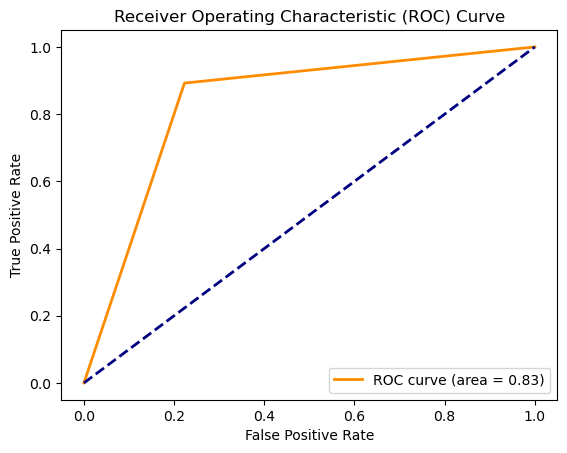

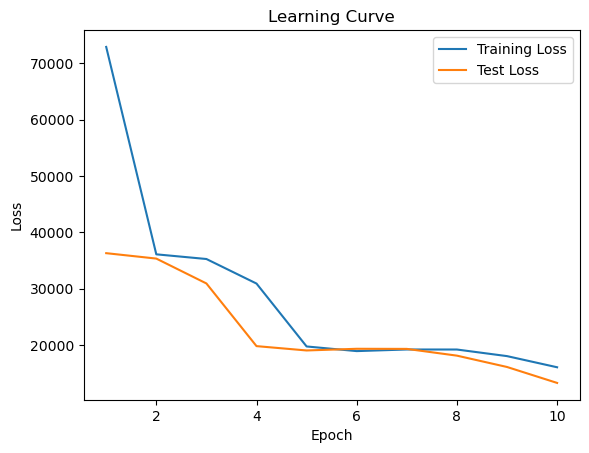

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.82   1270837
           1       0.80      0.89      0.84   1270926

    accuracy                           0.83   2541763
   macro avg       0.84      0.83      0.83   2541763
weighted avg       0.84      0.83      0.83   2541763



In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from torch_geometric.nn import GCNConv
from imblearn.over_sampling import RandomOverSampler
# Reshape the data for oversampling
X = data.x.numpy()
X = X.reshape(X.shape[0], -1)  
y = data.y.numpy()

# Apply oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Convert the resampled data back to PyTorch tensors
X_resampled = torch.FloatTensor(X_resampled)
y_resampled = torch.LongTensor(y_resampled)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create PyTorch Geometric Data objects for training and testing
train_data = Data(x=X_train, edge_index=data.edge_index, y=y_train)
test_data = Data(x=X_test, edge_index=data.edge_index, y=y_test)

# Define a GNN model
class GNN(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(in_channels, 16)
        self.conv2 = GCNConv(16, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Instantiate the model
model = GNN(in_channels=5, out_channels=1)

# Define the number of epochs
num_epochs = 10

# Loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Lists to store learning curve data
train_losses = []
test_losses = []

# Train the model
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(train_data)
    loss = criterion(output, train_data.y.view(-1, 1).float())  # Assuming binary classification
    loss.backward()
    optimizer.step()

    # Calculate accuracy on the training set
    predictions = (torch.sigmoid(output) > 0.5).float()
    accuracy = accuracy_score(train_data.y.cpu().numpy(), predictions.cpu().numpy())
    
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}, Training Accuracy: {accuracy:.4f}')
    
    # Append training loss to the list
    train_losses.append(loss.item())

    # Evaluate on the test set
    model.eval()
    with torch.no_grad():
        test_output = model(test_data)
        test_loss = criterion(test_output, test_data.y.view(-1, 1).float())
        test_predictions = (torch.sigmoid(test_output) > 0.5).float()

    # Calculate accuracy on the test set
    test_accuracy = accuracy_score(test_data.y.cpu().numpy(), test_predictions.cpu().numpy())
    print(f'Test Accuracy: {test_accuracy:.4f}')
    
    # Append test loss to the list
    test_losses.append(test_loss.item())
# Calculate ROC curve
fpr, tpr, _ = roc_curve(test_data.y.cpu().numpy(), test_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot learning curve
plt.figure()
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()
######################################
classification_rep = classification_report(test_data.y.cpu().numpy(), test_predictions.cpu().numpy())
print("Classification Report:\n", classification_rep)

1- The training accuracy starts at a relatively low value (47.14%) and improves over epochs. The test accuracy shows some fluctuations but generally increases. Both training and test accuracies stabilize toward the later epochs.

2- The ROC curve and AUC value after OverSampling inCreased to be 0.83 which better then ROC curve before OverSampling by far.
This ROC curve indicates a good performance on tpr.

3- The learning curve shows that number of losses decreasing over epochs in both trainig set and testing set but the training set starts with higher number of losses 70000. 

4- The model performs well for both classes, with F1-scores for 1 class 0.84 and 0 class 0.82. The model is achieving a good balance between precision and recall for both classes.

## Apply GRAPHsage without handling imbalance

Epoch 1/10, Loss: 662.0377, Training Accuracy: 0.9820
Test Accuracy: 0.9986
Epoch 2/10, Loss: 532.4287, Training Accuracy: 0.9987
Test Accuracy: 0.9986
Epoch 3/10, Loss: 424.0170, Training Accuracy: 0.9987
Test Accuracy: 0.9986
Epoch 4/10, Loss: 308.0480, Training Accuracy: 0.9987
Test Accuracy: 0.7590
Epoch 5/10, Loss: 9876.5625, Training Accuracy: 0.7598
Test Accuracy: 0.9986
Epoch 6/10, Loss: 254.3636, Training Accuracy: 0.9987
Test Accuracy: 0.9986
Epoch 7/10, Loss: 306.0576, Training Accuracy: 0.9987
Test Accuracy: 0.9986
Epoch 8/10, Loss: 350.0645, Training Accuracy: 0.9987
Test Accuracy: 0.9986
Epoch 9/10, Loss: 386.4363, Training Accuracy: 0.9987
Test Accuracy: 0.9987
Epoch 10/10, Loss: 416.2889, Training Accuracy: 0.9987
Test Accuracy: 0.9987


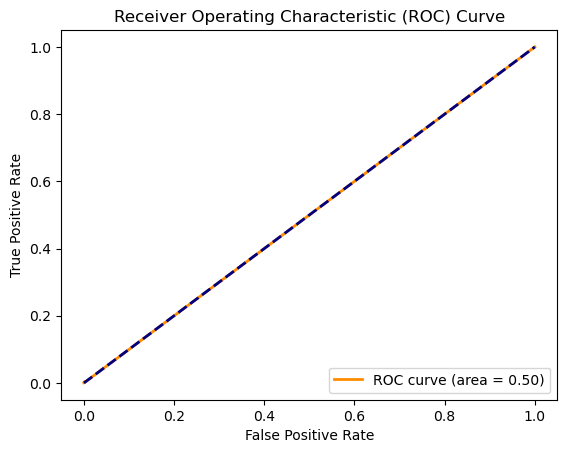

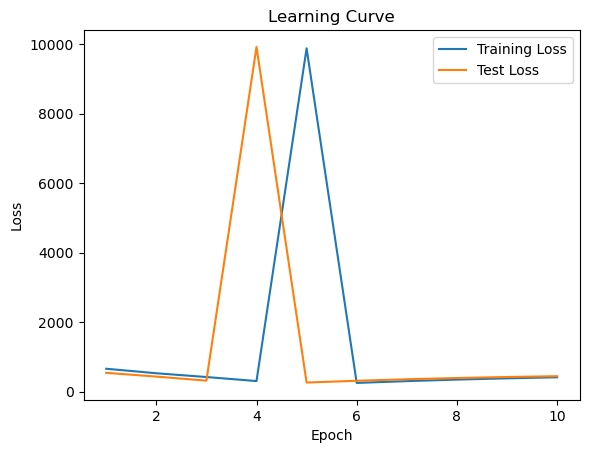

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270830
           1       0.05      0.00      0.00      1694

    accuracy                           1.00   1272524
   macro avg       0.52      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from torch_geometric.nn import SAGEConv

# Assuming 'data' is your PyTorch Geometric Data object with features, edge_index, and y (target).
# ...
num_samples = len(data.y)
num_train = int(0.8 * num_samples)  # Adjust the percentage as needed

train_indices, test_indices = torch.utils.data.random_split(range(num_samples), [num_train, num_samples - num_train])

# Create training and testing sets
train_data = Data(x=data.x[train_indices], edge_index=data.edge_index[:, train_indices], y=data.y[train_indices])
test_data = Data(x=data.x[test_indices], edge_index=data.edge_index[:, test_indices], y=data.y[test_indices])

# Continue with your GraphSAGE model definition...

# Define a GraphSAGE model
class GraphSAGE(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GraphSAGE, self).__init__()
        self.conv1 = SAGEConv(in_channels, 16)
        self.conv2 = SAGEConv(16, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Instantiate the model
model = GraphSAGE(in_channels=5, out_channels=1)

# Define the number of epochs
num_epochs = 10

# Loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Lists to store learning curve data
train_losses = []
test_losses = []

# Train the model
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(train_data)
    loss = criterion(output, train_data.y.view(-1, 1).float())  # Assuming binary classification
    loss.backward()
    optimizer.step()

    # Calculate accuracy on the training set
    predictions = (torch.sigmoid(output) > 0.5).float()
    accuracy = accuracy_score(train_data.y.cpu().numpy(), predictions.cpu().numpy())
    
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}, Training Accuracy: {accuracy:.4f}')
    
    # Append training loss to the list
    train_losses.append(loss.item())

    # Evaluate on the test set
    model.eval()
    with torch.no_grad():
        test_output = model(test_data)
        test_loss = criterion(test_output, test_data.y.view(-1, 1).float())
        test_predictions = (torch.sigmoid(test_output) > 0.5).float()

    # Calculate accuracy on the test set
    test_accuracy = accuracy_score(test_data.y.cpu().numpy(), test_predictions.cpu().numpy())
    print(f'Test Accuracy: {test_accuracy:.4f}')
    
    # Append test loss to the list
    test_losses.append(test_loss.item())

# Calculate ROC curve
fpr, tpr, _ = roc_curve(test_data.y.cpu().numpy(), torch.sigmoid(test_output).cpu().numpy())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot learning curve
plt.figure()
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()
######################################
classification_rep = classification_report(test_data.y.cpu().numpy(), test_predictions.cpu().numpy())
print("Classification Report:\n", classification_rep)

1- Training process is performing well, with both training and test accuracies reaching high values. The loss unstable  decreasing and increasing over epochs.

2- The ROC curve or the AUC value indicates a poor performance in tpr as its equal 50 which is not great.

3- The learning curve is unstable for both training and testing sets over epochs as it increasing and decreasing until epoch 6 the learning curve was perfect as the number of losses was low.

4-In classification report the all the class 0 predicted as 0 on the other hand all class 1 predicted false. There was 1270830 instance of class 0 and 1694 instance of class 1. 

## GRAPHsage after overSampling

Epoch 1/10, Loss: 184479.0938, Training Accuracy: 0.5881
Test Accuracy: 0.5956
Epoch 2/10, Loss: 138297.2969, Training Accuracy: 0.5959
Test Accuracy: 0.6182
Epoch 3/10, Loss: 93330.0000, Training Accuracy: 0.6185
Test Accuracy: 0.6522
Epoch 4/10, Loss: 50561.7500, Training Accuracy: 0.6525
Test Accuracy: 0.6083
Epoch 5/10, Loss: 24419.3906, Training Accuracy: 0.6082
Test Accuracy: 0.6993
Epoch 6/10, Loss: 13085.3809, Training Accuracy: 0.6993
Test Accuracy: 0.5000
Epoch 7/10, Loss: 22825.7051, Training Accuracy: 0.5000
Test Accuracy: 0.8383
Epoch 8/10, Loss: 17051.5156, Training Accuracy: 0.8382
Test Accuracy: 0.8628
Epoch 9/10, Loss: 16897.7266, Training Accuracy: 0.8626
Test Accuracy: 0.8736
Epoch 10/10, Loss: 15743.2832, Training Accuracy: 0.8735
Test Accuracy: 0.8793


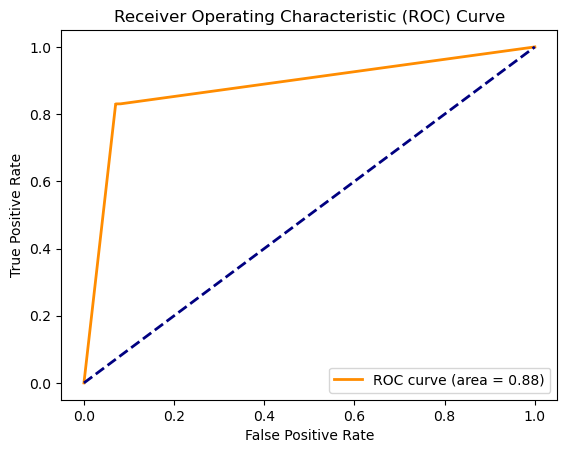

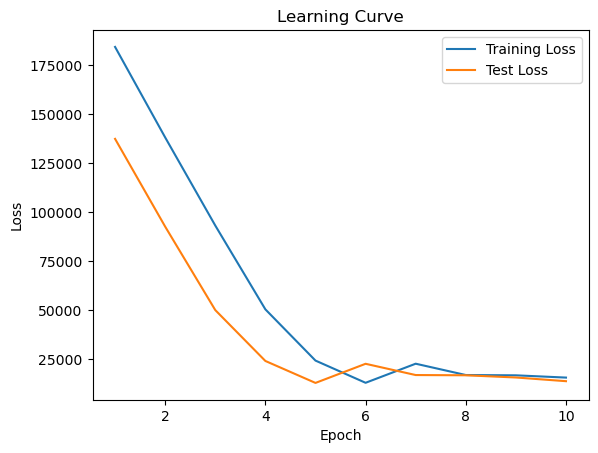

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.89   1270837
           1       0.92      0.83      0.87   1270926

    accuracy                           0.88   2541763
   macro avg       0.88      0.88      0.88   2541763
weighted avg       0.88      0.88      0.88   2541763



In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from torch_geometric.nn import SAGEConv
from imblearn.over_sampling import RandomOverSampler

# Reshape the data for oversampling
X = data.x.numpy()
X = X.reshape(X.shape[0], -1)  # Flatten the feature matrix
y = data.y.numpy()

# Apply oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Convert the resampled data back to PyTorch tensors
X_resampled = torch.FloatTensor(X_resampled)
y_resampled = torch.LongTensor(y_resampled)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create PyTorch Geometric Data objects for training and testing
train_data = Data(x=X_train, edge_index=data.edge_index, y=y_train)
test_data = Data(x=X_test, edge_index=data.edge_index, y=y_test)

# Define a GraphSAGE model
class GraphSAGE(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GraphSAGE, self).__init__()
        self.conv1 = SAGEConv(in_channels, 16)
        self.conv2 = SAGEConv(16, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Instantiate the model
model = GraphSAGE(in_channels=5, out_channels=1)

# Define the number of epochs
num_epochs = 10

# Loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Lists to store learning curve data
train_losses = []
test_losses = []

# Train the model
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(train_data)
    loss = criterion(output, train_data.y.view(-1, 1).float())  # Assuming binary classification
    loss.backward()
    optimizer.step()

    # Calculate accuracy on the training set
    predictions = (torch.sigmoid(output) > 0.5).float()
    accuracy = accuracy_score(train_data.y.cpu().numpy(), predictions.cpu().numpy())
    
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}, Training Accuracy: {accuracy:.4f}')
    
    # Append training loss to the list
    train_losses.append(loss.item())

    # Evaluate on the test set
    model.eval()
    with torch.no_grad():
        test_output = model(test_data)
        test_loss = criterion(test_output, test_data.y.view(-1, 1).float())
        test_predictions = (torch.sigmoid(test_output) > 0.5).float()

    # Calculate accuracy on the test set
    test_accuracy = accuracy_score(test_data.y.cpu().numpy(), test_predictions.cpu().numpy())
    print(f'Test Accuracy: {test_accuracy:.4f}')
    
    # Append test loss to the list
    test_losses.append(test_loss.item())
# Calculate ROC curve

fpr, tpr, _ = roc_curve(test_data.y.cpu().numpy(), torch.sigmoid(test_output).cpu().numpy())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot learning curve
plt.figure()
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()
######################################
classification_rep = classification_report(test_data.y.cpu().numpy(), test_predictions.cpu().numpy())
print("Classification Report:\n", classification_rep)

1- The training accuracy starts at a relatively low value (58.81%) and improves over epochs. The test accuracy shows some fluctuations but generally increases. Both training and test accuracies stabilize toward the later epochs.

2- The ROC curve and AUC value after OverSampling inCreased to be 0.88 which is the best one indicates the best performnace for tpr.

3- The learning curve shows that number of losses starts very high for both training and testing sets but it decreasing over epochs in both trainig set and testing set . The model is slightly overfitted.

4- The model performs well for both classes, with F1-scores for 1 class 0.87 and 0 class 0.89. The model is achieving a good balance between precision and recall for both classes. The model achieved the best f1 score, preccision and recall.

## GRAPHsage vs GCN

### Before OverSampling

There is no diffrence between GCN and Graphsage before OverSampling, both of them get the same accuracy which was high and they have the same ROC curve with value 50 which is very poor. They almost get the same f1 score for classes 0 and 1.

### After OverSampling

After OverSampling GRAPHsage achieved a better performance in every thing. It had higher accuracy than GCN with 88% while GCN had 83% and better ROCcurve with AUC value equal to 0.88 which the best one. And of course achived the best f1 score for classes 1 and 0.